In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [3]:
df = pd.read_csv('data/covid19-download.csv')

In [4]:
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[df.prname == 'Quebec'].reset_index(drop=True)

In [6]:
df['date'] = pd.to_datetime(df.date)

In [7]:
df = df[df.date > '2020-11-30'].reset_index(drop=True)
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,24,Quebec,Québec,2020-12-01,NaN,143548,0,7084.0,143548,2194452.0,...,409.0,4.82,9218.0,108.64,197.0,2.32,1317.0,15.52,28.0,0.33
1,24,Quebec,Québec,2020-12-02,NaN,145062,0,7125.0,145062,2204216.0,...,415.0,4.89,9632.0,113.52,210.0,2.47,1376.0,16.22,30.0,0.35
2,24,Quebec,Québec,2020-12-03,NaN,146532,0,7155.0,146532,2215810.0,...,411.0,4.84,9638.0,113.59,208.0,2.45,1377.0,16.23,30.0,0.35


In [8]:
df['day'] = (df.date-df.date[0]).dt.days
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
0,24,Quebec,Québec,2020-12-01,NaN,143548,0,7084.0,143548,2194452.0,...,4.82,9218.0,108.64,197.0,2.32,1317.0,15.52,28.0,0.33,0
1,24,Quebec,Québec,2020-12-02,NaN,145062,0,7125.0,145062,2204216.0,...,4.89,9632.0,113.52,210.0,2.47,1376.0,16.22,30.0,0.35,1
2,24,Quebec,Québec,2020-12-03,NaN,146532,0,7155.0,146532,2215810.0,...,4.84,9638.0,113.59,208.0,2.45,1377.0,16.23,30.0,0.35,2


In [9]:
dfb1 = df[(df.date > '2020-11-30')
        & (df.date < '2020-12-25')]

In [10]:
dfb1.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
0,24,Quebec,Québec,2020-12-01,NaN,143548,0,7084.0,143548,2194452.0,...,4.82,9218.0,108.64,197.0,2.32,1317.0,15.52,28.0,0.33,0
1,24,Quebec,Québec,2020-12-02,NaN,145062,0,7125.0,145062,2204216.0,...,4.89,9632.0,113.52,210.0,2.47,1376.0,16.22,30.0,0.35,1
2,24,Quebec,Québec,2020-12-03,NaN,146532,0,7155.0,146532,2215810.0,...,4.84,9638.0,113.59,208.0,2.45,1377.0,16.23,30.0,0.35,2


In [11]:
xb1 = dfb1['day']
xb1 = sm.add_constant(xb1)
yb1 = dfb1['numtoday']
xmin, xmax = xb1.min(), xb1.max()
est = sm.OLS(yb1, xb1).fit(cov_type = 'HC2')
xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(sm.add_constant(xb1fit))
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     49.06
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           4.98e-07
Time:                        17:20:17   Log-Likelihood:                -155.13
No. Observations:                  24   AIC:                             314.3
Df Residuals:                      22   BIC:                             316.6
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1410.6767     79.122     17.829      0.000    1255.600    1565.753
day           34.9448      4.989      7.004      0.000      25.166      44.723
==============================================================================
Omnibus:                        7.376   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.560
Skew:                           0.795   Prob(JB):                       0.0620
Kurtosis:                       4.741   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

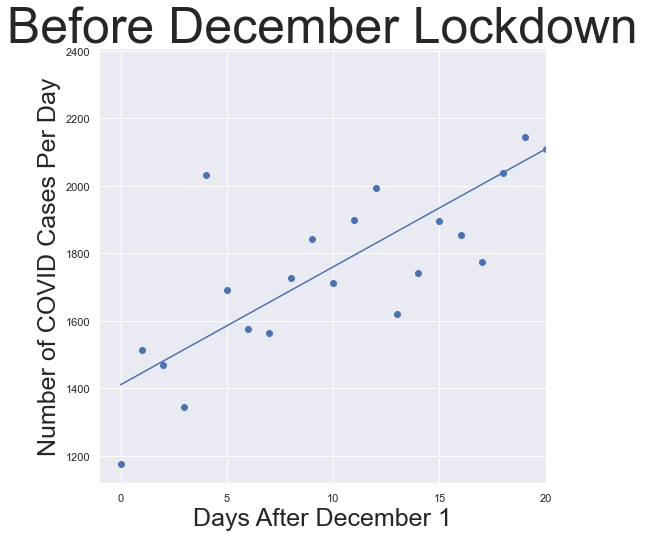

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(xb1.day, yb1)
plt.plot(xb1fit[:,1], yb1fit)
plt.title("Before December Lockdown", fontsize=50)
ax.set_xlabel("Days After December 1", fontsize=25)
ax.set_xlim(-1, 20)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
plt.show()

In [13]:
dfa1 = df[df.date > '2020-12-25']

In [14]:
dfa1.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
25,24,Quebec,Québec,2020-12-26,1.0,190364,0,8011.0,190364,2436763.0,...,6.32,15525.0,182.97,296.0,3.49,2218.0,26.14,42.0,0.50,25
26,24,Quebec,Québec,2020-12-27,1.0,192655,0,8023.0,192655,2448998.0,...,6.07,15670.0,184.68,287.0,3.38,2239.0,26.38,41.0,0.48,26
27,24,Quebec,Québec,2020-12-28,1.0,194930,0,8060.0,194930,2483527.0,...,6.21,15837.0,186.65,294.0,3.46,2262.0,26.66,42.0,0.49,27


In [15]:
xa1 = dfa1['day']
xa1 = sm.add_constant(xa1)
ya1 = dfa1['numtoday']
xmin, xmax = xa1.min(), xa1.max()
est = sm.OLS(ya1, xa1).fit(cov_type='HC2')
xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(sm.add_constant(xa1fit))
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     21.20
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           7.62e-05
Time:                        17:20:18   Log-Likelihood:                -231.28
No. Observations:                  31   AIC:                             466.6
Df Residuals:                      29   BIC:                             469.4
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4403.9839    536.405      8.210      0.000    3352.650    5455.318
day          -54.4835     11.834     -4.604      0.000     -77.678     -31.289
==============================================================================
Omnibus:                       13.925   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.304
Skew:                           1.118   Prob(JB):                     0.000175
Kurtosis:                       5.898   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

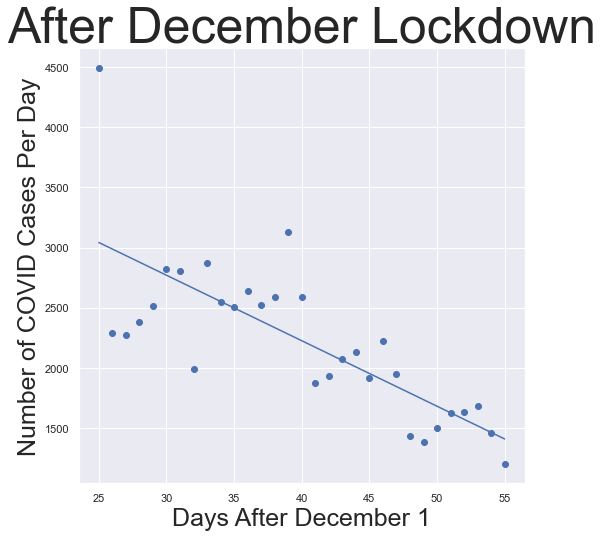

In [16]:
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(xa1.day, ya1)
plt.plot(xa1fit[:,1], ya1fit)
plt.title("After December Lockdown", fontsize=50)
ax.set_xlabel("Days After December 1", fontsize=25)
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
plt.show()

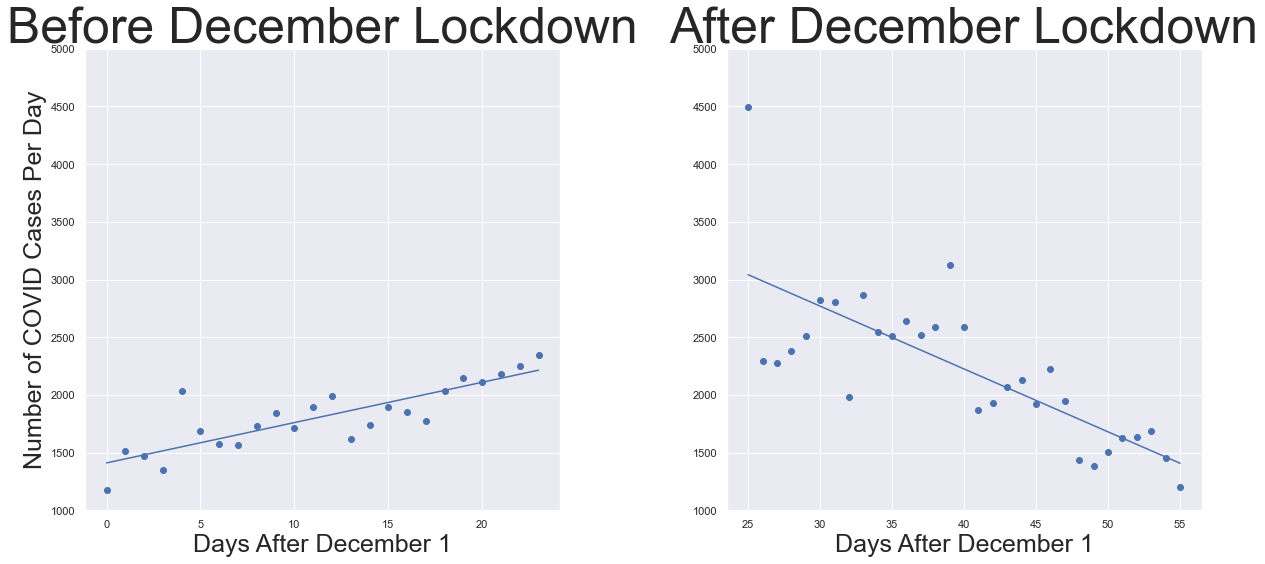

In [17]:
fig, axes = plt.subplots(1,2, figsize = (18,8))
for iter_, ax in enumerate(axes.flatten()):
    if iter_ == 0:
        ax.scatter(xb1.day, yb1)
        ax.plot(xb1fit[:,1], yb1fit)
        ax.set_title("Before December Lockdown", fontsize=50)
        ax.set_xlabel("Days After December 1", fontsize=25)
        ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
        ax.set_ylim(1000,5000)
    else:
        ax.scatter(xa1.day, ya1)
        ax.plot(xa1fit[:,1], ya1fit)
        ax.set_title("After December Lockdown", fontsize=50)
        ax.set_xlabel("Days After December 1", fontsize=25)
        ax.set_ylim(1000,5000)
        plt.tight_layout()

In [18]:
Xb1 = pd.DataFrame(xb1)
Xb1['day2'] = Xb1.day ** 2
est = sm.OLS(yb1, Xb1).fit(cov_type = 'HC2')
xmin, xmax = Xb1.min(), Xb1.max()
Xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(Xb1fit)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     33.04
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           3.27e-07
Time:                        17:20:19   Log-Likelihood:                -155.04
No. Observations:                  24   AIC:                             316.1
Df Residuals:                      21   BIC:                             319.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1437.7042    129.618     11.092      0.000    1183.657    1691.751
day           27.5736     21.753      1.268      0.205     -15.062      70.209
day2           0.3205      0.805      0.398      0.690      -1.257       1.897
==============================================================================
Omnibus:                        7.419   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.660
Skew:                           0.787   Prob(JB):                       0.0590
Kurtosis:                       4.785   Cond. No.                         686.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [19]:
Xa1 = pd.DataFrame(xa1)
Xa1['day2'] = Xa1.day ** 2
est = sm.OLS(ya1, Xa1).fit(cov_type = 'HC2')
xmin, xmax = Xa1.min(), Xa1.max()
Xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(Xa1fit)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     47.15
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           1.09e-09
Time:                        17:20:19   Log-Likelihood:                -231.08
No. Observations:                  31   AIC:                             468.2
Df Residuals:                      28   BIC:                             472.5
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3403.5971   3341.595      1.019      0.308   -3145.808    9953.002
day           -1.8315    160.007     -0.011      0.991    -315.439     311.776
day2          -0.6581      1.857     -0.354      0.723      -4.298       2.981
==============================================================================
Omnibus:                       19.708   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.516
Skew:                           1.435   Prob(JB):                     8.69e-08
Kurtosis:                       7.115   Cond. No.                     3.98e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

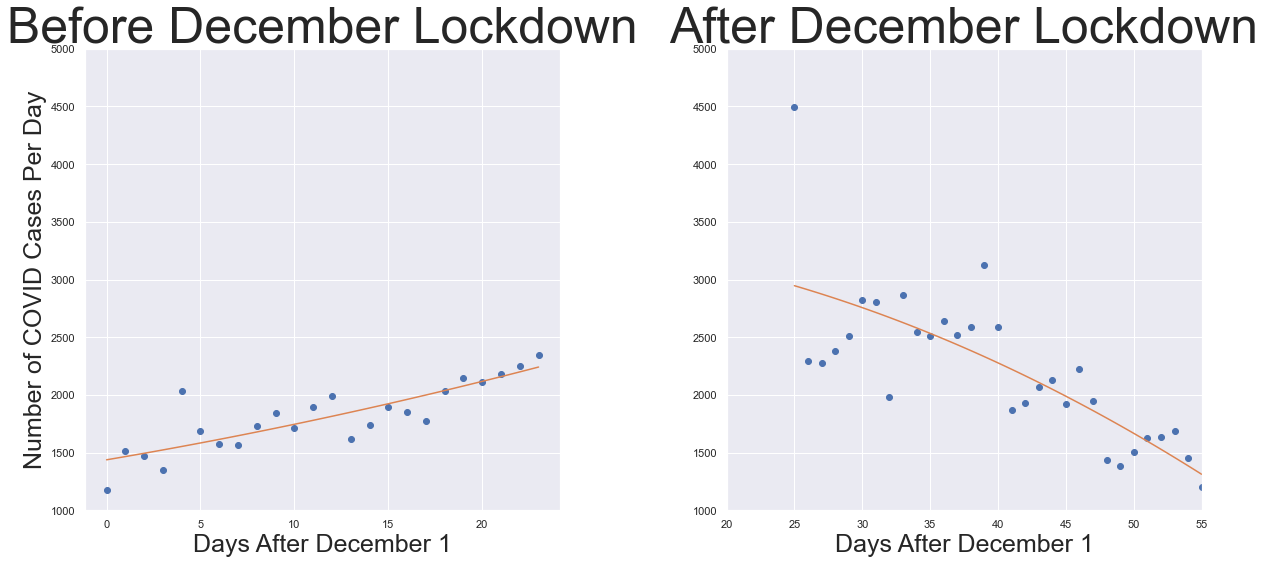

In [20]:
fig, axes = plt.subplots(1,2, figsize = (18,8))
for iter_, ax in enumerate(axes.flatten()):
    if iter_ == 0:
        ax.scatter(xb1.day, yb1)
        coefficients = np.polyfit(xb1.day, yb1, 2)
        yb1fit = np.polyval(coefficients, xb1fit)
        ax.plot(xb1fit, yb1fit)
        ax.set_title("Before December Lockdown", fontsize=50)
        ax.set_xlabel("Days After December 1", fontsize=25)
        ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
        ax.set_ylim(1000,5000)
    else:
        ax.scatter(xa1.day, ya1)
        coefficients = np.polyfit(xa1.day, ya1, 2)
        ya1fit = np.polyval(coefficients, xa1fit)
        ax.plot(xa1fit, ya1fit)
        ax.set_title("After December Lockdown", fontsize=50)
        ax.set_xlabel("Days After December 1", fontsize=25)
        ax.set_xlim(20,55)
        ax.set_ylim(1000,5000)
        plt.tight_layout()

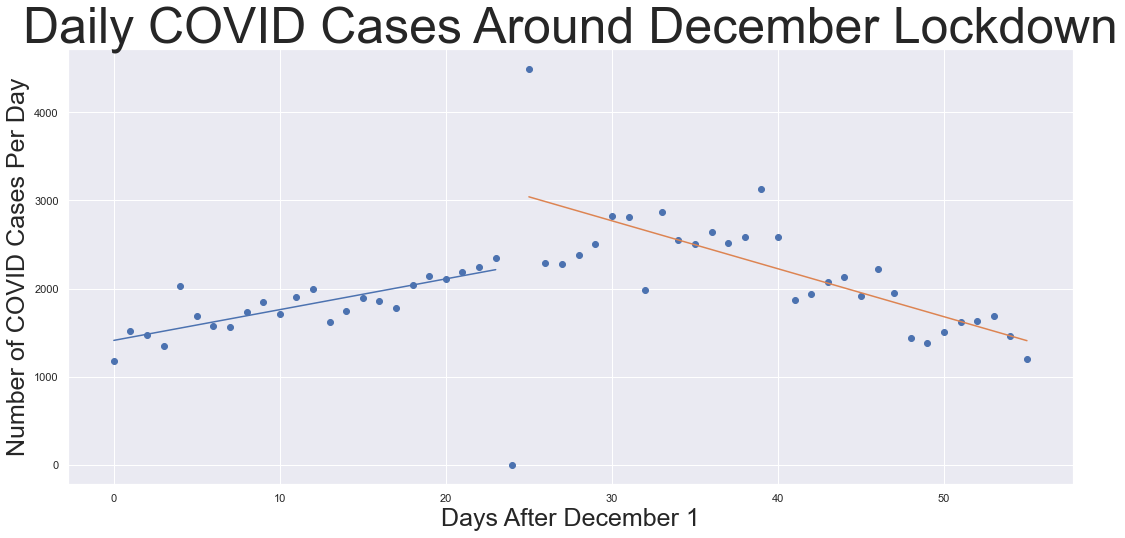

In [21]:
fig, ax = plt.subplots(figsize = (18,8))
x = df['day']
y = df['numtoday']
plt.scatter(x, y)
xb1 = dfb1['day']
xb1 = sm.add_constant(xb1)
xmin, xmax = xb1.min(), xb1.max()
est = sm.OLS(yb1, xb1).fit(cov_type='HC2')
xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(sm.add_constant(xb1fit))
ax.plot(xb1fit[:,1], yb1fit)
xa1 = dfa1['day']
xa1 = sm.add_constant(xa1)
xmin, xmax = xa1.min(), xa1.max()
est = sm.OLS(ya1, xa1).fit(cov_type='HC2')
xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(sm.add_constant(xa1fit))
ax.plot(xa1fit[:,1], ya1fit)
plt.title("Daily COVID Cases Around December Lockdown", fontsize=50)
ax.set_xlabel("Days After December 1", fontsize=25)
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
#ax.set_ylim(-100,1100)
plt.show()

For the time after the December lockdown, the all of the data until the current date was used in order to include as much data as possible for the regression analysis.  For the time period before the December lockdown, data was taken from the beginning of December.  The median is 5 to 6 days between exposure and sympton onset, but the incubation period could last as long as 14 days [1].  A time period was chosen such that there was a comarable amount of time on either side of the lockdown, with an additional period of 2 weeks to allow for the effects of the lockdown to be seen.

Initially, a linear model was applied to the data.  A constant term was used for both the time period before the December lockdown and after the lockdown since we would not want a model that predicts zero COVID cases at the beginning of either time frame. The R^2 score was seen to be 0.708 for the time period to the left of the December lockdown.  A somewhat lower R^2 score of 0.573 was observed for the time period to the right of the second lockdown.  A polynomial of degree 2 was then added to both time periods.  Since only a marginal increase was observed for both time periods, a linear model was chosen for the sake of simplicity.

Looking at the coefficients of the linear regression, the constant term was equal to approximately 1410.68 COVID cases, and the coefficient was equal to approximately 34.94 COVID cases per day until the December lockdown.  The p-value of both the constant of coefficient was 0.000, so we can be confident that both are representative of the data.  To the right of this lockdown, the constant term was equal to approximately 4403.98 COVID cases, with the coefficient around -54.48 cases per day. The p-value of both the constant of coefficient was 0.000, so we can be confident that both are representative of the data. The reversal in slope seems to indicate that the December lockdown is at least somewhat effective.  However, it could also be explained by the fact that less people are going outside due to the colder weather.  Vaccines are also slowly being given, so this also could somewhat reduce the number of cases.